In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# built in python modules
import datetime
import logging
import os
import inspect

# python add-ons
import numpy as np
import pandas as pd

In [2]:
import pvlib
from pvlib.location import Location

In [3]:
tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')

In [4]:
print(tus)

Tucson: latitude=32.2, longitude=-111, tz=US/Arizona, altitude=700


pvlib.solarosition.pyephem: sun_coords['apparent_zenith']  #cjwcjw
2014-06-24 07:00:00+00:00    124.039132
2014-06-24 23:40:00+00:00     55.945032
Freq: 1000T, Name: apparent_zenith, dtype: float64
                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-24 00:00:00-07:00          -34.039132        352.695587 -34.039132   
2014-06-24 00:01:00-07:00          -34.065534        352.970625 -34.065534   
2014-06-24 00:02:00-07:00          -34.090926        353.245855 -34.090926   
2014-06-24 00:03:00-07:00          -34.115309        353.521302 -34.115309   
2014-06-24 00:04:00-07:00          -34.138686        353.796969 -34.138686   

                              azimuth  apparent_zenith      zenith  
2014-06-24 00:00:00-07:00  352.695587       124.039132  124.039132  
2014-06-24 00:01:00-07:00  352.970625       124.065534  124.065534  
2014-06-24 00:02:00-07:00  353.245855       124.090926  124.090926  
2014-06-24 00:03:00-07:00  353.521302       124.115309  1

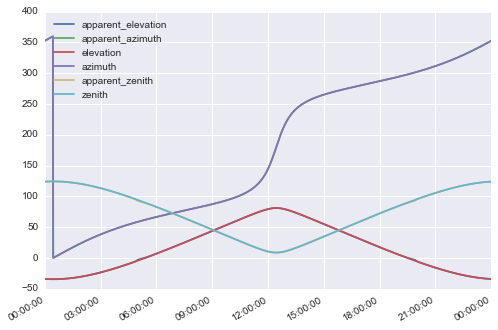

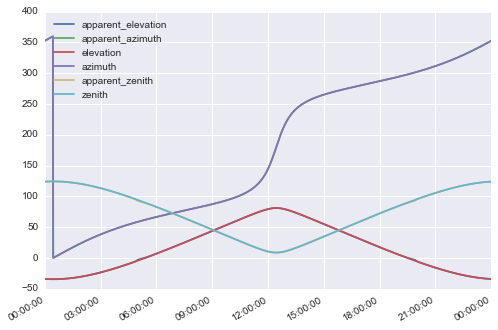

In [5]:
times = pd.date_range(start=datetime.datetime(2014,6,24), end=datetime.datetime(2014,6,25), freq='1Min')

pyephem_ephem = pvlib.solarposition.get_solarposition(times, tus, method='pyephem')
print(pyephem_ephem.head())
pyephem_ephem.plot()

pyephem_ephem = pvlib.solarposition.get_solarposition(times.tz_localize(tus.tz), tus, method='pyephem')
print(pyephem_ephem.head())
pyephem_ephem.plot()

pvlib.atmosphere.relativeairmass: zenith input z  #cjwcjw
2014-06-24 00:00:00-07:00    124.039132
2014-06-24 01:40:00-07:00    121.681559
2014-06-24 03:20:00-07:00    110.646839
2014-06-24 05:00:00-07:00     94.261679
2014-06-24 06:40:00-07:00     75.074710
2014-06-24 08:20:00-07:00     54.490533
2014-06-24 10:00:00-07:00     33.388623
2014-06-24 11:40:00-07:00     13.516088
2014-06-24 13:20:00-07:00     14.728809
2014-06-24 15:00:00-07:00     34.872553
2014-06-24 16:40:00-07:00     55.968808
2014-06-24 18:20:00-07:00     76.488099
2014-06-24 20:00:00-07:00     95.537484
2014-06-24 21:40:00-07:00    111.650713
2014-06-24 23:20:00-07:00    122.186170
Freq: 100T, Name: zenith, dtype: float64
pvlib.atmosphere.relativeairmass: zenith input z  #cjwcjw
2014-06-24 00:00:00-07:00    124.039132
2014-06-24 01:40:00-07:00    121.681559
2014-06-24 03:20:00-07:00    110.646839
2014-06-24 05:00:00-07:00     92.761368
2014-06-24 06:40:00-07:00     75.015171
2014-06-24 08:20:00-07:00     54.468031
201

(0, 100)

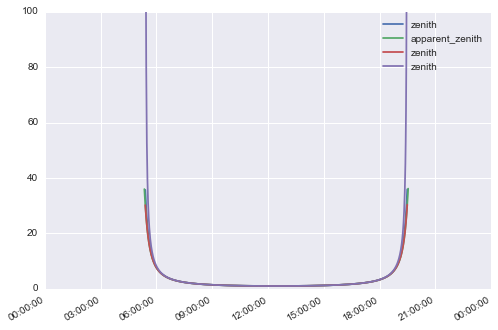

In [6]:
pvlib.atmosphere.relativeairmass(pyephem_ephem['zenith']).plot()
pvlib.atmosphere.relativeairmass(pyephem_ephem['apparent_zenith']).plot()
pvlib.atmosphere.relativeairmass(pyephem_ephem['zenith'], model='young1994').plot()
pvlib.atmosphere.relativeairmass(pyephem_ephem['zenith'], model='simple').plot()
plt.legend()
plt.ylim(0,100)

pvlib.atmosphere.relativeairmass: zenith input z  #cjwcjw
2014-06-24 00:00:00-07:00    124.039132
2014-06-24 01:40:00-07:00    121.681559
2014-06-24 03:20:00-07:00    110.646839
2014-06-24 05:00:00-07:00     94.261679
2014-06-24 06:40:00-07:00     75.074710
2014-06-24 08:20:00-07:00     54.490533
2014-06-24 10:00:00-07:00     33.388623
2014-06-24 11:40:00-07:00     13.516088
2014-06-24 13:20:00-07:00     14.728809
2014-06-24 15:00:00-07:00     34.872553
2014-06-24 16:40:00-07:00     55.968808
2014-06-24 18:20:00-07:00     76.488099
2014-06-24 20:00:00-07:00     95.537484
2014-06-24 21:40:00-07:00    111.650713
2014-06-24 23:20:00-07:00    122.186170
Freq: 100T, Name: zenith, dtype: float64
pvlib.atmosphere.relativeairmass: zenith input z  #cjwcjw
2014-06-24 00:00:00-07:00    124.039132
2014-06-24 01:40:00-07:00    121.681559
2014-06-24 03:20:00-07:00    110.646839
2014-06-24 05:00:00-07:00     92.761368
2014-06-24 06:40:00-07:00     75.015171
2014-06-24 08:20:00-07:00     54.468031
201

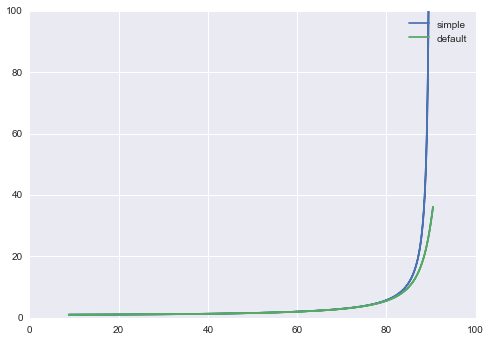

In [7]:
plt.plot(pyephem_ephem['zenith'], pvlib.atmosphere.relativeairmass(pyephem_ephem['zenith'], model='simple'), label='simple')
plt.plot(pyephem_ephem['zenith'], pvlib.atmosphere.relativeairmass(pyephem_ephem['apparent_zenith']), label='default')
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend()

## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

In [8]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas, pvlib

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.2.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pandas 0.16.2
pvlib 0.2.1dev
Sun Jul 12 14:29:24 2015 South Africa Standard Time